# 导入所需库
导入pandas和numpy等必要的库。

In [3]:
import pandas as pd
import numpy as np
import openpyxl

# 确保显示所有列
pd.set_option('display.max_columns', None)

# 加载数据
使用pandas加载athletes.csv数据文件。

In [47]:
# 加载数据

# 使用pandas加载athletes.csv数据文件
athletes_df = pd.read_excel(r'D:/mcm2025/data/raw/changed_athletes.xlsx')

# 显示前几行数据以确认加载成功
athletes_df.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


# 数据预处理
对数据进行清洗和预处理，包括处理缺失值和数据类型转换。

In [48]:
# 保存数据
athletes_df.to_excel(r'D:/mcm2025/data/raw/changed_athletes.xlsx', index=False)

In [49]:
# 数据预处理

# 检查数据的基本信息
athletes_df.info()

# 检查缺失值
athletes_df.isnull().sum()

# 填充缺失值或删除缺失值
# 这里假设我们删除所有包含缺失值的行
athletes_df.dropna(inplace=True)

# 确认缺失值已处理
athletes_df.isnull().sum()

# 创建金、银、铜牌列
athletes_df['Gold'] = athletes_df['Medal'].apply(lambda x: 1 if x == 'Gold' else 0)
athletes_df['Silver'] = athletes_df['Medal'].apply(lambda x: 1 if x == 'Silver' else 0)
athletes_df['Bronze'] = athletes_df['Medal'].apply(lambda x: 1 if x == 'Bronze' else 0)

# 转换数据类型
# 假设年份是整数类型，国家和项目是字符串类型，奖牌数是整数类型
athletes_df['Year'] = athletes_df['Year'].astype(int)
athletes_df['Team'] = athletes_df['Team'].astype(str)
athletes_df['Event'] = athletes_df['Event'].astype(str)

# 添加总奖牌数列
athletes_df['Total'] = athletes_df['Gold'] + athletes_df['Silver'] + athletes_df['Bronze']

# 显示预处理后的数据
athletes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235308 entries, 0 to 235307
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    235308 non-null  object
 1   Sex     235308 non-null  object
 2   Team    235308 non-null  object
 3   NOC     235308 non-null  object
 4   Year    235308 non-null  int64 
 5   City    235308 non-null  object
 6   Sport   235308 non-null  object
 7   Event   235308 non-null  object
 8   Medal   235308 non-null  object
dtypes: int64(1), object(8)
memory usage: 16.2+ MB


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Gold,Silver,Bronze,Total
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,0,0,0,0
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,0,0,0,0
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,0,0,0,0
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,0,0,1
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,0,0,0,0


# 按年份统计奖牌数
按年份统计金、银、铜牌数，并计算总奖牌数。

In [25]:
# 按年份统计奖牌数

# 按年份分组并统计金、银、铜牌数以及总奖牌数
medals_by_year = athletes_df.groupby('Year').agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total': 'sum'
}).reset_index()

# 显示按年份统计的奖牌数
medals_by_year

,Year,Gold,Silver,Bronze,Total
0,1896,62,43,38,143
1,1900,201,227,173,601
2,1904,173,163,150,486
3,1906,157,156,142,455
4,1908,293,279,250,822
5,1912,326,310,291,927
6,1920,493,448,357,1298
7,1924,274,277,269,820
8,1928,242,226,238,706
9,1932,228,211,202,641


# 按国家统计奖牌数
按国家统计金、银、铜牌数，并计算总奖牌数。

In [26]:
# 按国家分组并统计金、银、铜牌数以及总奖牌数
medals_by_country = athletes_df.groupby('Team').agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total': 'sum'
}).reset_index()

# 显示按国家统计的奖牌数
medals_by_country

,Team,Gold,Silver,Bronze,Total
0,30. Februar,0,0,0,0
1,A North American Team,0,0,4,4
2,AIN,1,4,1,6
3,Acipactli,0,0,0,0
4,Acturus,0,0,0,0
...,...,...,...,...,...
1135,Zambia,0,1,2,3
1136,Zefyros,0,0,0,0
1137,Zimbabwe,17,4,1,22
1138,Zut,0,3,0,3


# 按项目统计奖牌数
按项目统计金、银、铜牌数，并计算总奖牌数。

In [27]:
# 按项目统计奖牌数

# 按项目分组并统计金、银、铜牌数以及总奖牌数
medals_by_event = athletes_df.groupby('Event').agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total': 'sum'
}).reset_index()

# 显示按项目统计的奖牌数
medals_by_event

,Event,Gold,Silver,Bronze,Total
0,10m Air Pistol Men,2,2,2,6
1,10m Air Pistol Mixed Team,4,2,4,10
2,10m Air Pistol Women,1,2,2,5
3,10m Air Rifle Men,2,2,2,6
4,10m Air Rifle Mixed Team,4,4,2,10
...,...,...,...,...,...
1036,"Wrestling Women's Flyweight, Freestyle",4,4,7,15
1037,"Wrestling Women's Heavyweight, Freestyle",3,3,6,12
1038,"Wrestling Women's Light-Heavyweight, Freestyle",1,0,2,3
1039,"Wrestling Women's Lightweight, Freestyle",4,3,7,14


# 计算总奖牌数
计算每个国家、每个年份、每个项目的总奖牌数。

In [65]:
# 计算总奖牌数

# 按年份、国家、项目分组并统计金、银、铜牌数以及总奖牌数
medals_by_year_country_event = athletes_df.groupby(['Year', 'NOC', 'Event']).agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total': 'sum'
}).reset_index()

# 显示按年份、国家、项目统计的奖牌数
medals_by_year_country_event

# 保存数据
medals_by_year_country_event.to_csv(r'D:/mcm2025/data/processed/medals_by_year_country_event.csv', index=False)

In [75]:
medals_df = pd.read_excel(r'D:\mcm2025\data\raw\changed_medal_counts.xlsx')
medals_df = medals_df.replace(to_replace=r"'", value="", regex=True)

# 保存数据
medals_df.to_excel(r'D:/mcm2025/data/processed/changed_medal_counts.xlsx', index=False)

In [76]:
map_df = pd.read_excel(r'D:/mcm2025/data/raw/NOC_map.xlsx')
medals_df = pd.read_excel(r'D:\mcm2025\data\processed\changed_medal_counts.xlsx')
map_df

,Unnamed: 0,Country,NOC,Unnamed: 3
0,阿富汗,Afghanistan,AFG,NaN
1,奧兰(阿赫韦南马),Åland Islands,ALA,NaN
2,阿尔巴尼亚,Albania,ALB,NaN
3,奧尔德尼岛,Alderney,—,NaN
4,阿尔及利亚,Algeria,DZA,NaN
...,...,...,...,...
271,NaN,Cabo Verde,CPV,NaN
272,NaN,Refugee Olympic Team,EOR,NaN
273,NaN,Ceylon,SRI,NaN
274,NaN,British West Indies,IVB,NaN


In [81]:
# 查找替换NOC
medals_df['NOC'] = medals_df['NOC'].replace(map_df.set_index('Country')['NOC'].to_dict())

# 保存数据
#medals_df.to_excel(r'D:/mcm2025/data/processed/changed_medal_counts.xlsx', index=False)

In [82]:
medals_df

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRC,10,18,19,47,1896
2,3,DEU,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,QAT,0,0,1,1,2024
1431,84,EOR,0,0,1,1,2024
1432,84,SGP,0,0,1,1,2024
1433,84,SVK,0,0,1,1,2024


In [83]:
merged_df = pd.merge(medals_by_year_country_event, medals_df, left_on=['NOC', 'Year'], right_on=['NOC', 'Year'], how='left')

merged_df

,Year,NOC,Event,Gold_x,Silver_x,Bronze_x,Total_x,Rank,Gold_y,Silver_y,Bronze_y,Total_y
0,1896,AUS,"Athletics Men's 1,500 metres",1,0,0,1,8.0,2.0,0.0,0.0,2.0
1,1896,AUS,Athletics Men's 800 metres,1,0,0,1,8.0,2.0,0.0,0.0,2.0
2,1896,AUS,Athletics Men's Marathon,0,0,0,0,8.0,2.0,0.0,0.0,2.0
3,1896,AUS,Tennis Men's Doubles,0,0,1,1,8.0,2.0,0.0,0.0,2.0
4,1896,AUS,Tennis Men's Singles,0,0,0,0,8.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104551,2024,ZIM,Men's 200m Backstroke,0,0,0,0,NaN,NaN,NaN,NaN,NaN
104552,2024,ZIM,Men's Marathon,0,0,0,0,NaN,NaN,NaN,NaN,NaN
104553,2024,ZIM,Men's Single Sculls,0,0,0,0,NaN,NaN,NaN,NaN,NaN
104554,2024,ZIM,Women's 100m Freestyle,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [84]:
merged_df['gold_ratio']=merged_df['Gold_x']/merged_df['Gold_y']
merged_df['silver_ratio']=merged_df['Silver_x']/merged_df['Silver_y']
merged_df['bronze_ratio']=merged_df['Bronze_x']/merged_df['Bronze_y']
merged_df['total_ratio']=merged_df['Total_x']/merged_df['Total_y']

# 替换NaN值为0
merged_df.fillna(0, inplace=True)

merged_df

,Year,NOC,Event,Gold_x,Silver_x,Bronze_x,Total_x,Rank,Gold_y,Silver_y,Bronze_y,Total_y,gold_ratio,silver_ratio,bronze_ratio,total_ratio
0,1896,AUS,"Athletics Men's 1,500 metres",1,0,0,1,8.0,2.0,0.0,0.0,2.0,0.5,0.0,0.0,0.5
1,1896,AUS,Athletics Men's 800 metres,1,0,0,1,8.0,2.0,0.0,0.0,2.0,0.5,0.0,0.0,0.5
2,1896,AUS,Athletics Men's Marathon,0,0,0,0,8.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,1896,AUS,Tennis Men's Doubles,0,0,1,1,8.0,2.0,0.0,0.0,2.0,0.0,0.0,inf,0.5
4,1896,AUS,Tennis Men's Singles,0,0,0,0,8.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104551,2024,ZIM,Men's 200m Backstroke,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104552,2024,ZIM,Men's Marathon,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104553,2024,ZIM,Men's Single Sculls,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104554,2024,ZIM,Women's 100m Freestyle,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
merged_df.to_csv(r'D:/mcm2025/data/processed/p2_merged_medals.csv', index=False)

In [4]:
merged_df=pd.read_csv(r'D:/mcm2025/data/processed/p2_merged_medals.csv')

In [10]:
# 提取CHN和USA的数据
chn_df = merged_df[(merged_df['NOC'] == 'CHN') & (merged_df['Event'] == "Volleyball Women's Volleyball")]
usa_df = merged_df[(merged_df['NOC'] == 'USA') & (merged_df['Event'] == "Volleyball Women's Volleyball")]

In [15]:
print(usa_df)

       Year  NOC                          Event  Gold_x  Silver_x  Bronze_x  \
22954  1964  USA  Volleyball Women's Volleyball       0         0         0   
26241  1968  USA  Volleyball Women's Volleyball       0         0         0   
40588  1984  USA  Volleyball Women's Volleyball       0        12         0   
45776  1988  USA  Volleyball Women's Volleyball       0         0         0   
51747  1992  USA  Volleyball Women's Volleyball       0         0        12   
58081  1996  USA  Volleyball Women's Volleyball       0         0         0   
64687  2000  USA  Volleyball Women's Volleyball       0         0         0   
71148  2004  USA  Volleyball Women's Volleyball       0         0         0   
77805  2008  USA  Volleyball Women's Volleyball       0        12         0   
84480  2012  USA  Volleyball Women's Volleyball       0        12         0   
91293  2016  USA  Volleyball Women's Volleyball       0         0        12   

       Total_x  Rank  Gold_y  Silver_y  Bronze_y  T

In [16]:
print(chn_df)

       Year  NOC                          Event  Gold_x  Silver_x  Bronze_x  \
37137  1984  CHN  Volleyball Women's Volleyball      10         0         0   
41802  1988  CHN  Volleyball Women's Volleyball       0         0        11   
47074  1992  CHN  Volleyball Women's Volleyball       0         0         0   
53067  1996  CHN  Volleyball Women's Volleyball       0         9         0   
59535  2000  CHN  Volleyball Women's Volleyball       0         0         0   
66134  2004  CHN  Volleyball Women's Volleyball      12         0         0   
72646  2008  CHN  Volleyball Women's Volleyball       0         0        12   
79316  2012  CHN  Volleyball Women's Volleyball       0         0         0   
86078  2016  CHN  Volleyball Women's Volleyball      12         0         0   

       Total_x  Rank  Gold_y  Silver_y  Bronze_y  Total_y  gold_ratio  \
37137       10   4.0    15.0       8.0       9.0     32.0    0.666667   
41802       11  11.0     5.0      11.0      12.0     28.0    0.

In [17]:
from scipy.stats import ttest_ind

# 分析美国队
usa_coach_years = [2008]  # 郎平担任教练的年份
usa_other_years = usa_df[~usa_df['Year'].isin(usa_coach_years)]

# 提取教练年份数据
usa_coach_data = usa_df[usa_df['Year'].isin(usa_coach_years)]

# 计算描述性统计
usa_coach_desc = usa_coach_data[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']].describe()
usa_other_desc = usa_other_years[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']].describe()

# 输出描述性统计
print("描述性统计（美国，郎平担任教练期间）:")
print(usa_coach_desc)
print("\n描述性统计（美国，其他年份）:")
print(usa_other_desc)

# 进行t检验
t_stat, p_value = ttest_ind(usa_coach_data[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']],
                            usa_other_years[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']],
                            equal_var=False)

print("\nt检验结果（美国）:")
print("统计量：", t_stat)
print("P值：", p_value)


描述性统计（美国，郎平担任教练期间）:
       Gold_x  Silver_x  Bronze_x  Total_x
count     1.0       1.0       1.0      1.0
mean      0.0      12.0       0.0     12.0
std       NaN       NaN       NaN      NaN
min       0.0      12.0       0.0     12.0
25%       0.0      12.0       0.0     12.0
50%       0.0      12.0       0.0     12.0
75%       0.0      12.0       0.0     12.0
max       0.0      12.0       0.0     12.0

描述性统计（美国，其他年份）:
       Gold_x   Silver_x   Bronze_x    Total_x
count    10.0  10.000000  10.000000  10.000000
mean      0.0   2.400000   2.400000   4.800000
std       0.0   5.059644   5.059644   6.196773
min       0.0   0.000000   0.000000   0.000000
25%       0.0   0.000000   0.000000   0.000000
50%       0.0   0.000000   0.000000   0.000000
75%       0.0   0.000000   0.000000  12.000000
max       0.0  12.000000  12.000000  12.000000

t检验结果（美国）:
统计量： [nan nan nan nan]
P值： [nan nan nan nan]


C:\Users\alanz\AppData\Local\Temp\ipykernel_8496\2056445071.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(usa_coach_data[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']],
c:\Users\alanz\.conda\envs\mcm2025\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\alanz\.conda\envs\mcm2025\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


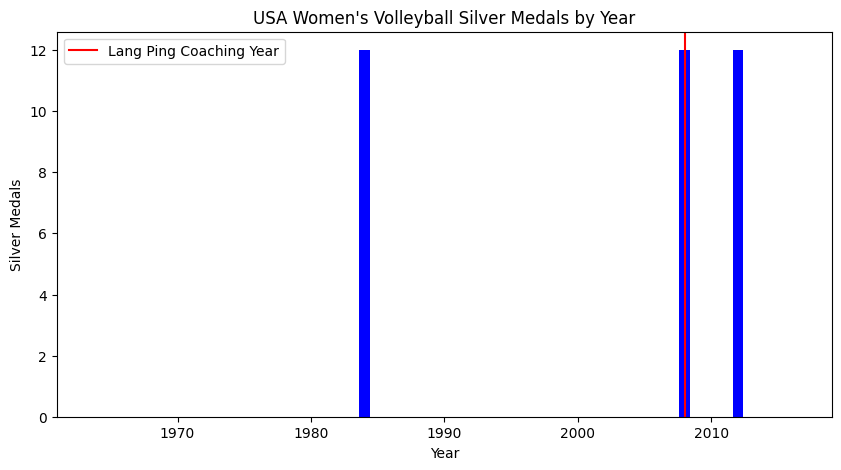

In [18]:
import matplotlib.pyplot as plt

# 数据准备
years = usa_df['Year']
silver_x = usa_df['Silver_x']

# 绘图
plt.figure(figsize=(10, 5))
plt.bar(years, silver_x, color='b')
plt.xlabel('Year')
plt.ylabel('Silver Medals')
plt.title('USA Women\'s Volleyball Silver Medals by Year')
plt.axvline(x=2008, color='r', label='Lang Ping Coaching Year')
plt.legend()
plt.show()


描述性统计（中国，郎平担任教练期间）:
       Year  NOC                          Event  Gold_x  Silver_x  Bronze_x  \
37137  1984  CHN  Volleyball Women's Volleyball      10         0         0   
41802  1988  CHN  Volleyball Women's Volleyball       0         0        11   
47074  1992  CHN  Volleyball Women's Volleyball       0         0         0   
53067  1996  CHN  Volleyball Women's Volleyball       0         9         0   
59535  2000  CHN  Volleyball Women's Volleyball       0         0         0   
66134  2004  CHN  Volleyball Women's Volleyball      12         0         0   
72646  2008  CHN  Volleyball Women's Volleyball       0         0        12   
79316  2012  CHN  Volleyball Women's Volleyball       0         0         0   
86078  2016  CHN  Volleyball Women's Volleyball      12         0         0   

       Total_x  Rank  Gold_y  Silver_y  Bronze_y  Total_y  gold_ratio  \
37137       10   4.0    15.0       8.0       9.0     32.0    0.666667   
41802       11  11.0     5.0      11.0     

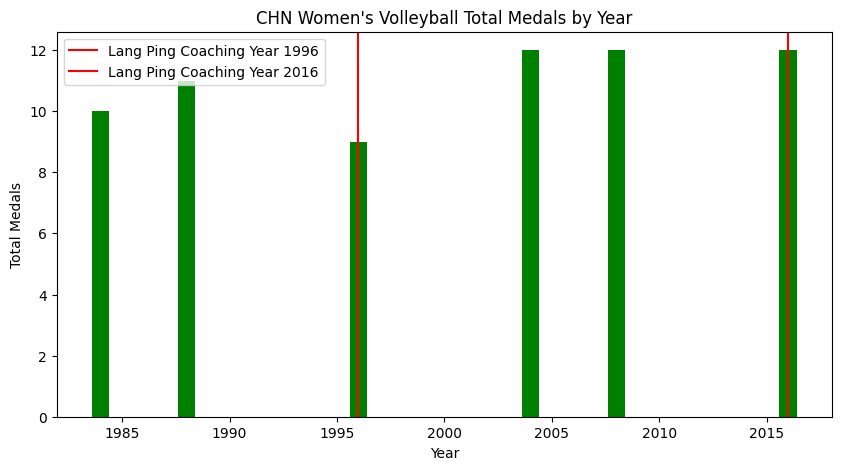

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U测试
u_stat, u_p_value = mannwhitneyu(chn_coach_data['Total_x'], chn_other_years['Total_x'], alternative='two-sided')

print("描述性统计（中国，郎平担任教练期间）:")
print(chn_coach_desc)
print("\n描述性统计（中国，其他年份）:")
print(chn_other_desc)
print("\nMann-Whitney U测试结果（中国）:")
print("U统计量：", u_stat)
print("P值：", u_p_value)

# 绘制图表
plt.figure(figsize=(10, 5))
plt.bar(chn_df['Year'], chn_df['Total_x'], color='g')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('CHN Women\'s Volleyball Total Medals by Year')
plt.axvline(x=1996, color='r', label='Lang Ping Coaching Year 1996')
plt.axvline(x=2016, color='r', label='Lang Ping Coaching Year 2016')
plt.legend()
plt.show()


In [25]:
import pandas as pd

# 假设数据已经加载到DataFrame中
# chn_df 和 usa_df 分别为中国和美国的数据

# 合并数据集
data = pd.concat([chn_df, usa_df])
data

,Year,NOC,Event,Gold_x,Silver_x,Bronze_x,Total_x,Rank,Gold_y,Silver_y,Bronze_y,Total_y,gold_ratio,silver_ratio,bronze_ratio,total_ratio
37137,1984,CHN,Volleyball Women's Volleyball,10,0,0,10,4.0,15.0,8.0,9.0,32.0,0.666667,0.000000,0.000000,0.312500
41802,1988,CHN,Volleyball Women's Volleyball,0,0,11,11,11.0,5.0,11.0,12.0,28.0,0.000000,0.000000,0.916667,0.392857
47074,1992,CHN,Volleyball Women's Volleyball,0,0,0,0,4.0,16.0,22.0,16.0,54.0,0.000000,0.000000,0.000000,0.000000
53067,1996,CHN,Volleyball Women's Volleyball,0,9,0,9,4.0,16.0,22.0,12.0,50.0,0.000000,0.409091,0.000000,0.180000
59535,2000,CHN,Volleyball Women's Volleyball,0,0,0,0,3.0,28.0,16.0,14.0,58.0,0.000000,0.000000,0.000000,0.000000
66134,2004,CHN,Volleyball Women's Volleyball,12,0,0,12,2.0,32.0,17.0,14.0,63.0,0.375000,0.000000,0.000000,0.190476
72646,2008,CHN,Volleyball Women's Volleyball,0,0,12,12,1.0,48.0,22.0,30.0,100.0,0.000000,0.000000,0.400000,0.120000
79316,2012,CHN,Volleyball Women's Volleyball,0,0,0,0,2.0,39.0,31.0,22.0,92.0,0.000000,0.000000,0.000000,0.000000
86078,2016,CHN,Volleyball Women's Volleyball,12,0,0,12,3.0,26.0,18.0,26.0,70.0,0.461538,0.000000,0.000000,0.171429
22954,1964,USA,Volleyball Women's Volleyball,0,0,0,0,1.0,36.0,26.0,28.0,90.0,0.000000,0.000000,0.000000,0.000000


In [26]:
import pandas as pd

# 假设数据已经加载到DataFrame中
# chn_df 和 usa_df 分别为中国和美国的数据

# 合并数据集
data = pd.concat([chn_df, usa_df])

# 定义郎平担任教练的年份
coach_years = {2008: 'USA', 1996: 'CHN', 2016: 'CHN'}

# 标记干预组
data['Treatment'] = data.apply(lambda x: 1 if x['Year'] in coach_years and coach_years[x['Year']] == x['NOC'] else 0, axis=1)

# 计算每个国家每年的总奖牌数平均值
pre_treatment = data[data['Year'] < min(coach_years.keys())].groupby('NOC')['total_ratio'].mean().reset_index()
post_treatment = data[data['Year'] >= min(coach_years.keys())].groupby('NOC')['total_ratio'].mean().reset_index()

# 计算差异
diff_pre = pre_treatment['total_ratio'].diff().dropna()
diff_post = post_treatment['total_ratio'].diff().dropna()
did = diff_post.mean() - diff_pre.mean()

print("Difference-in-Differences estimate of the treatment effect: ", did)


Difference-in-Differences estimate of the treatment effect:  0.142403099338836


In [32]:
usa_df2 = merged_df[(merged_df['NOC'] == 'USA') & (merged_df['Event'] == "Gymnastics Women's Team All-Around")]
rou_df = merged_df[(merged_df['NOC'] == 'ROU') & (merged_df['Event'] == "Gymnastics Women's Team All-Around")]  

In [35]:
# 合并数据集
data2 = pd.concat([rou_df, usa_df2])

In [39]:
from scipy.stats import ttest_ind

# 分析美国队
usa_coach_years = [1996]  # bele担任教练的年份
usa_other_years = usa_df[~usa_df['Year'].isin(usa_coach_years)]

# 提取教练年份数据
usa_coach_data = usa_df[usa_df['Year'].isin(usa_coach_years)]

# 计算描述性统计
usa_coach_desc = usa_coach_data[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']].describe()
usa_other_desc = usa_other_years[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']].describe()

# 输出描述性统计
print("描述性统计（美国，bele担任教练期间）:")
print(usa_coach_desc)
print("\n描述性统计（美国，其他年份）:")
print(usa_other_desc)

# 进行t检验
t_stat, p_value = ttest_ind(usa_coach_data[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']],
                            usa_other_years[['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']],
                            equal_var=False)

print("\nt检验结果（美国）:")
print("统计量：", t_stat)
print("P值：", p_value)


描述性统计（美国，bele担任教练期间）:
       Gold_x  Silver_x  Bronze_x  Total_x
count     1.0       1.0       1.0      1.0
mean      0.0       0.0       0.0      0.0
std       NaN       NaN       NaN      NaN
min       0.0       0.0       0.0      0.0
25%       0.0       0.0       0.0      0.0
50%       0.0       0.0       0.0      0.0
75%       0.0       0.0       0.0      0.0
max       0.0       0.0       0.0      0.0

描述性统计（美国，其他年份）:
       Gold_x   Silver_x   Bronze_x    Total_x
count    10.0  10.000000  10.000000  10.000000
mean      0.0   3.600000   2.400000   6.000000
std       0.0   5.796551   5.059644   6.324555
min       0.0   0.000000   0.000000   0.000000
25%       0.0   0.000000   0.000000   0.000000
50%       0.0   0.000000   0.000000   6.000000
75%       0.0   9.000000   0.000000  12.000000
max       0.0  12.000000  12.000000  12.000000

t检验结果（美国）:
统计量： [nan nan nan nan]
P值： [nan nan nan nan]


c:\Users\alanz\.conda\envs\mcm2025\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\alanz\.conda\envs\mcm2025\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


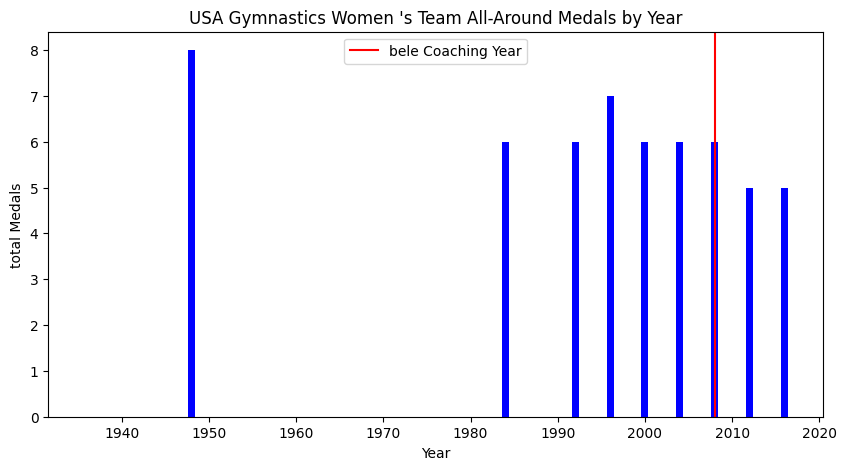

In [41]:
import matplotlib.pyplot as plt

# 数据准备
years = usa_df2['Year']
total_x = usa_df2['Total_x']

# 绘图
plt.figure(figsize=(10, 5))
plt.bar(years, total_x, color='b')
plt.xlabel('Year')
plt.ylabel('total Medals')
plt.title('USA Gymnastics Women \'s Team All-Around Medals by Year')
plt.axvline(x=2008, color='r', label='bele Coaching Year')
plt.legend()
plt.show()


In [46]:

# 定义bela担任教练的年份
coach_years = {1996: 'USA', 1976: 'ROU'}

# 标记干预组
data2['Treatment'] = data.apply(lambda x: 1 if x['Year'] in coach_years and coach_years[x['Year']] == x['NOC'] else 0, axis=1)

# 计算每个国家每年的总奖牌数平均值
pre_treatment = data2[data2['Year'] < min(coach_years.keys())].groupby('NOC')['Total_x'].mean().reset_index()
post_treatment = data2[data2['Year'] > min(coach_years.keys())].groupby('NOC')['Total_x'].mean().reset_index()

# 计算差异
diff_pre = pre_treatment['Total_x'].diff().dropna()
diff_post = post_treatment['Total_x'].diff().dropna()
did = diff_post.mean() - diff_pre.mean()

print("Difference-in-Differences estimate of the treatment effect: ", did)


Difference-in-Differences estimate of the treatment effect:  0.8444444444444441
